In [70]:
import pickle
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer

import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
#from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn import cross_validation
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [ ]:
#Loading all the pickles files generated during preprocessing!!!
#1.loading avgW2Vec files:-
with open('test_avgw2v.pkl', 'rb') as f:
       test_avgw2v = pickle.load(f)
with open('train_avgw2v.pkl', 'rb') as f:
        train_avgw2v = pickle.load(f)



#3. loading Bow files:-
with open('testbow.pkl', 'rb') as f:
        testbow = pickle.load(f)
with open('trainbow.pkl', 'rb') as f:
        trainbow = pickle.load(f)


In [68]:
#loading test train dataframe:-
with open('traindf.pkl', 'rb') as f:
        train_df = pickle.load(f)
        f.close()
with open('testdf.pkl', 'rb') as f:
        test_df = pickle.load(f)
        f.close()


# Applying Knn Brute Force:-

1.Applying knn Brute Force on Bow:-

In [6]:
print("Number of training points "+str(trainbow.shape[0]))
print("Number of test points "+str(testbow.shape[0]))


Number of training points 28000
Number of test points 12000


In [43]:
def brute_knn_classifier(X,Y):
    neighbors = [i for i in range(1,150,5)]
    cv_scores = []
    for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors=k, algorithm = "brute")
        scores = cross_val_score(knn,X,Y,cv = 10,scoring = 'roc_auc')
        cv_scores.append(scores.mean())
    #MSE = [1 - x for x in cv_scores]
    optimal_k = neighbors[cv_scores.index(max(cv_scores))]
    print("Optimal number of neighbor is"+" "+str(optimal_k))
    plt.plot(neighbors,cv_scores)
    for xy in zip(neighbors, np.round(cv_scores,3)):
        plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
    plt.title("auc vs K")
    plt.xlabel('Number of neighbors K')
    plt.ylabel('auc')
    plt.show()

    print("the auc for each k value is : ", np.round(cv_scores,3))
    return optimal_k


        

In [ ]:
optimal_k = brute_knn_classifier(trainbow,train_df["Score"])

In [25]:
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k,algorithm = "brute")

# fitting the model
knn_optimal.fit(trainbow, train_df["Score"])
#knn_optimal.fit(bow_data, y_train)

# predict the response
pred = knn_optimal.predict(testbow)



In [46]:
y_proabs = knn_optimal.predict_proba(testbow)

In [47]:
auc_score = roc_auc_score(test_df["Score"],y_proabs[:,1])
print("The auc score on test data is ",auc_score)

The auc score on test data is  0.7850037312712134


In [27]:
import scikitplot as skplt
import matplotlib.pyplot as plt
#referenced from : -https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

# ROC curve for test data:-

In [32]:
y_proabs_train = knn_optimal.predict_proba(trainbow)

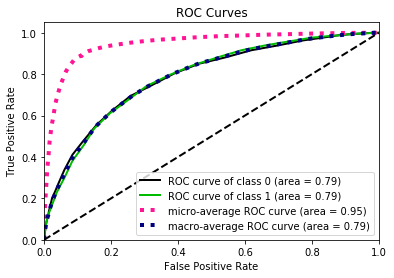

In [48]:
skplt.metrics.plot_roc_curve(test_df["Score"], y_proabs)
plt.show()

# ROC curve on train data:-

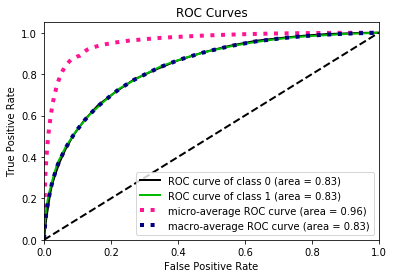

In [49]:
skplt.metrics.plot_roc_curve(train_df["Score"], y_proabs_train)
plt.show()

In [50]:
from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(test_df["Score"], pred)
print(c_matrix)

[[    1  1334]
 [    0 10665]]


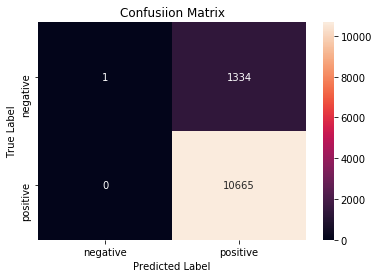

In [51]:
import seaborn as sns
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(c_matrix, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

 2  Applying knn brute force on tfidf

In [24]:
#2. loading tfidf files:-
with open('testtfidf.pkl', 'rb') as f:
        testtfidf = pickle.load(f)
with open('traintfidf.pkl', 'rb') as f:
        traintfidf = pickle.load(f)

In [25]:
print("Number of training points "+str(traintfidf.shape[0]))
print("Number of test points "+str(testtfidf.shape[0]))


Number of training points 28000
Number of test points 12000


Optimal number of neighbor is 146


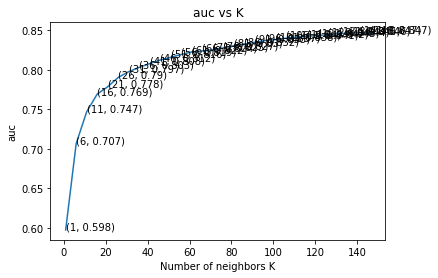

the auc for each k value is :  [0.598 0.707 0.747 0.769 0.778 0.79  0.797 0.803 0.808 0.812 0.816 0.819
 0.822 0.824 0.825 0.827 0.83  0.832 0.835 0.837 0.838 0.84  0.841 0.842
 0.843 0.844 0.845 0.846 0.847 0.847]


In [53]:
optimal_k = brute_knn_classifier(traintfidf,train_df["Score"])

In [27]:
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k,algorithm = "brute")

# fitting the model
knn_optimal.fit(traintfidf, train_df["Score"])
#knn_optimal.fit(bow_data, y_train)

# predict the response
pred = knn_optimal.predict(testtfidf)



In [28]:
y_proabs = knn_optimal.predict_proba(testtfidf)

In [29]:
auc_score = roc_auc_score(test_df["Score"],y_proabs[:,1])
print("The auc score on test data is ",auc_score)

The auc score on test data is  0.8283542899083598


In [30]:
import scikitplot as skplt
import matplotlib.pyplot as plt
#referenced from : -https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

/Users/yogeshmehra/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


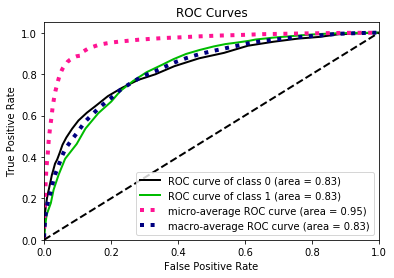

In [31]:
skplt.metrics.plot_roc_curve(test_df["Score"], y_proabs)
plt.show()

In [32]:
y_proabs_train = knn_optimal.predict_proba(traintfidf)



/Users/yogeshmehra/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


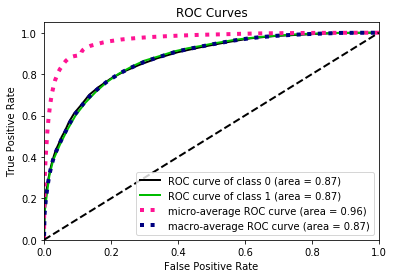

In [33]:
skplt.metrics.plot_roc_curve(train_df["Score"], y_proabs_train)
plt.show()

In [34]:
from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(test_df["Score"], pred)
print(c_matrix)

[[    9  1326]
 [    0 10665]]


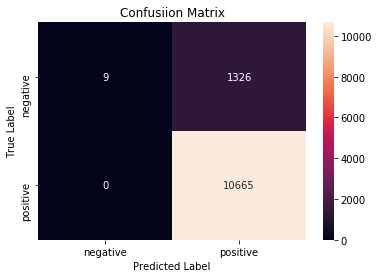

In [35]:
import seaborn as sns
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(c_matrix, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

3 Applying Knn brute force on Avgw2V:-

In [36]:
with open('test_avgw2v.pkl', 'rb') as f:
       test_avgw2v = pickle.load(f)
with open('train_avgw2v.pkl', 'rb') as f:
        train_avgw2v = pickle.load(f)


In [38]:
print("Number of training points "+str(len(train_avgw2v)))
print("Number of test points "+str(len(test_avgw2v)))


Number of training points 28000
Number of test points 12000


Optimal number of neighbor is 126


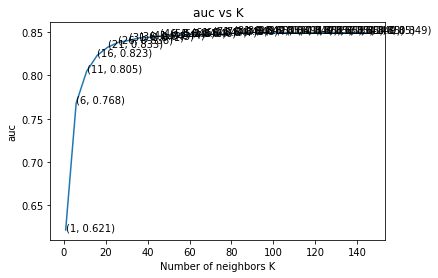

the auc for each k value is :  [0.621 0.768 0.805 0.823 0.833 0.838 0.841 0.843 0.844 0.846 0.846 0.846
 0.847 0.847 0.848 0.848 0.849 0.85  0.85  0.849 0.849 0.85  0.85  0.85
 0.85  0.85  0.849 0.85  0.85  0.849]


In [44]:
optimal_k = brute_knn_classifier(train_avgw2v,train_df["Score"])

In [45]:
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k,algorithm = "brute")

# fitting the model
knn_optimal.fit(train_avgw2v,train_df["Score"])
#knn_optimal.fit(bow_data, y_train)

# predict the response
pred = knn_optimal.predict(test_avgw2v)



In [46]:
y_proabs = knn_optimal.predict_proba(test_avgw2v)

In [47]:
auc_score = roc_auc_score(test_df["Score"],y_proabs[:,1])
print("The auc score on test data is ",auc_score)

The auc score on test data is  0.8417336978565821


In [48]:
import scikitplot as skplt
import matplotlib.pyplot as plt
#referenced from : -https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

/Users/yogeshmehra/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


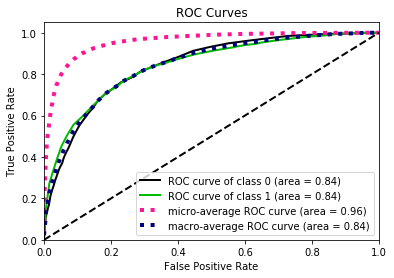

In [49]:
skplt.metrics.plot_roc_curve(test_df["Score"], y_proabs)
plt.show()

In [50]:
y_proabs_train = knn_optimal.predict_proba(train_avgw2v)



/Users/yogeshmehra/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


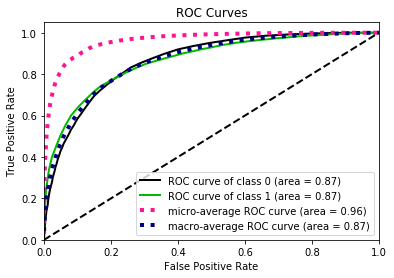

In [51]:
skplt.metrics.plot_roc_curve(train_df["Score"], y_proabs_train)
plt.show()

In [52]:
from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(test_df["Score"], pred)
print(c_matrix)

[[   65  1270]
 [   15 10650]]


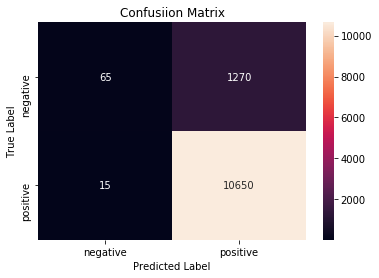

In [53]:
import seaborn as sns
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(c_matrix, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Applying Knn Kd_tree


1.Applying knn kd_tree on avg_tfidf

In [55]:
def kd_knn_classifier(X,Y):
    neighbors = [i for i in range(1,150,5)]
    cv_scores = []
    for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors=k, algorithm = "kd_tree")
        scores = cross_val_score(knn,X,Y,cv = 10,scoring = 'roc_auc')
        cv_scores.append(scores.mean())
    #MSE = [1 - x for x in cv_scores]
    optimal_k = neighbors[cv_scores.index(max(cv_scores))]
    print("Optimal number of neighbor is"+" "+str(optimal_k))
    plt.plot(neighbors,cv_scores)
    for xy in zip(neighbors, np.round(cv_scores,3)):
        plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
    plt.title("auc vs K")
    plt.xlabel('Number of neighbors K')
    plt.ylabel('auc')
    plt.show()

    print("the auc for each k value is : ", np.round(cv_scores,3))
    return optimal_k


        

Optimal number of neighbor is 126


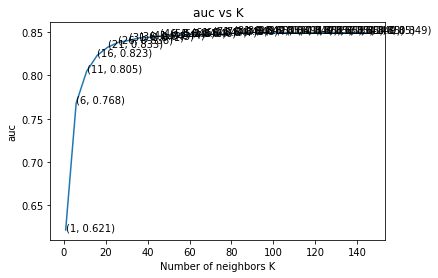

the auc for each k value is :  [0.621 0.768 0.805 0.823 0.833 0.838 0.841 0.843 0.844 0.846 0.846 0.846
 0.847 0.847 0.848 0.848 0.849 0.85  0.85  0.849 0.849 0.85  0.85  0.85
 0.85  0.85  0.849 0.85  0.85  0.849]


In [56]:
optimal_k = kd_knn_classifier(train_avgw2v,train_df["Score"])

In [57]:
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k,algorithm = "kd_tree")

# fitting the model
knn_optimal.fit(train_avgw2v,train_df["Score"])
#knn_optimal.fit(bow_data, y_train)

# predict the response
pred = knn_optimal.predict(test_avgw2v)



In [58]:
y_proabs = knn_optimal.predict_proba(test_avgw2v)

In [59]:
auc_score = roc_auc_score(test_df["Score"],y_proabs[:,1])
print("The auc score on test data is ",auc_score)

The auc score on test data is  0.8417336978565821


In [60]:
import scikitplot as skplt
import matplotlib.pyplot as plt
#referenced from : -https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

/Users/yogeshmehra/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


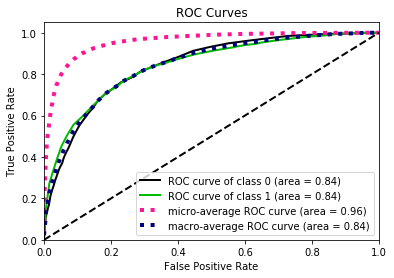

In [61]:
skplt.metrics.plot_roc_curve(test_df["Score"], y_proabs)
plt.show()

In [62]:
y_proabs_train = knn_optimal.predict_proba(train_avgw2v)



/Users/yogeshmehra/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


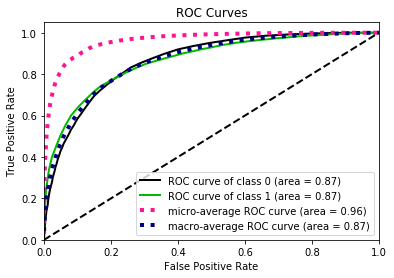

In [63]:
skplt.metrics.plot_roc_curve(train_df["Score"], y_proabs_train)
plt.show()

In [64]:
from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(test_df["Score"], pred)
print(c_matrix)

[[   65  1270]
 [   15 10650]]


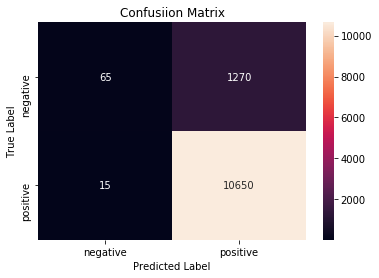

In [65]:
import seaborn as sns
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(c_matrix, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

2 Applying knn kd_tree on Bag of words:-

In [71]:
count_vect = CountVectorizer(max_features = 500)
trainx = count_vect.fit_transform(train_df['CleanedText'].values)
#trainy = train_df["Score"]

testx = count_vect.transform(test_df['CleanedText'].values)
#test_y = test_df["Score"]

Optimal number of neighbor is 146


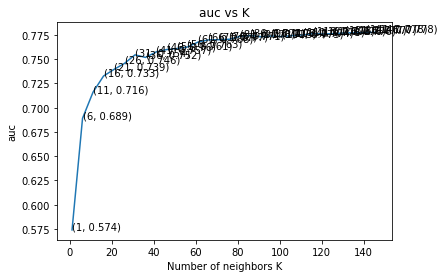

the auc for each k value is :  [0.574 0.689 0.716 0.733 0.739 0.746 0.754 0.752 0.757 0.76  0.761 0.763
 0.768 0.77  0.77  0.771 0.773 0.774 0.773 0.774 0.773 0.774 0.775 0.776
 0.776 0.776 0.777 0.777 0.778 0.778]


In [75]:
optimal_k = kd_knn_classifier(trainx.toarray(),train_df["Score"])

In [77]:
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k,algorithm = "kd_tree")

# fitting the model
knn_optimal.fit(trainx.toarray(),train_df["Score"])
#knn_optimal.fit(bow_data, y_train)

# predict the response
pred = knn_optimal.predict(testx.toarray())




In [78]:
y_proabs = knn_optimal.predict_proba(testx.toarray())


In [79]:
auc_score = roc_auc_score(test_df["Score"],y_proabs[:,1])
print("The auc score on test data is ",auc_score)

The auc score on test data is  0.765609619480572


In [80]:
import scikitplot as skplt
import matplotlib.pyplot as plt
#referenced from : -https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

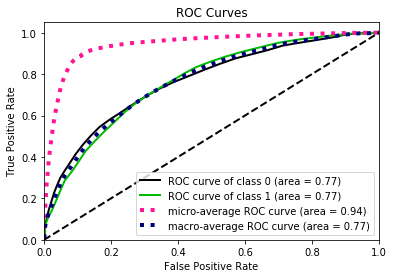

In [81]:
skplt.metrics.plot_roc_curve(test_df["Score"], y_proabs)
plt.show()

In [82]:
y_proabs_train = knn_optimal.predict_proba(trainx.toarray())




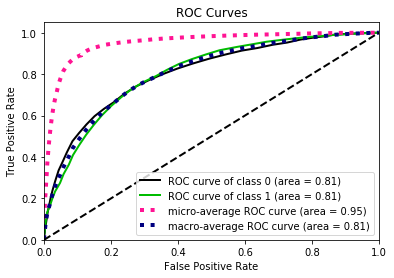

In [83]:
skplt.metrics.plot_roc_curve(train_df["Score"], y_proabs_train)
plt.show()

In [84]:
from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(test_df["Score"], pred)
print(c_matrix)

[[    0  1335]
 [    0 10665]]


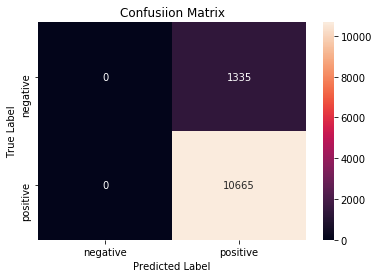

In [85]:
import seaborn as sns
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(c_matrix, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

3 Applying knn kd_tree on tfidf:-

In [87]:
tf_idf_vect = TfidfVectorizer(max_features = 250)
trainx = tf_idf_vect.fit_transform(train_df['CleanedText'].values)

testx = tf_idf_vect.transform(test_df['CleanedText'].values)



Optimal number of neighbor is 146


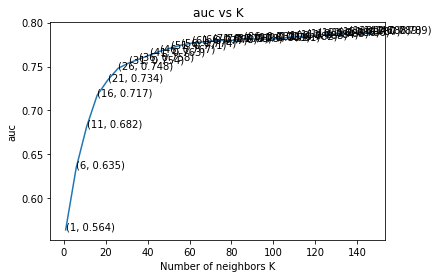

the auc for each k value is :  [0.564 0.635 0.682 0.717 0.734 0.748 0.754 0.758 0.763 0.767 0.771 0.774
 0.777 0.778 0.779 0.78  0.78  0.782 0.781 0.781 0.782 0.783 0.784 0.785
 0.786 0.786 0.787 0.788 0.789 0.789]


In [88]:
optimal_k = kd_knn_classifier(trainx.toarray(),train_df["Score"])

In [89]:
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k,algorithm = "kd_tree")

# fitting the model
knn_optimal.fit(trainx.toarray(),train_df["Score"])
#knn_optimal.fit(bow_data, y_train)

# predict the response
pred = knn_optimal.predict(testx.toarray())




In [90]:
y_proabs = knn_optimal.predict_proba(testx.toarray())


In [91]:
auc_score = roc_auc_score(test_df["Score"],y_proabs[:,1])
print("The auc score on test data is ",auc_score)

The auc score on test data is  0.7732596912087738


In [92]:
import scikitplot as skplt
import matplotlib.pyplot as plt
#referenced from : -https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

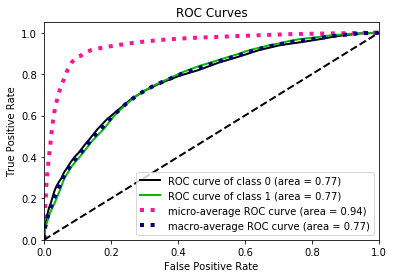

In [93]:
skplt.metrics.plot_roc_curve(test_df["Score"], y_proabs)
plt.show()

In [94]:
y_proabs_train = knn_optimal.predict_proba(trainx.toarray())




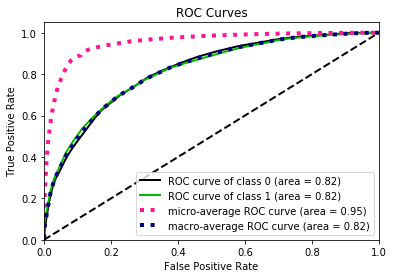

In [95]:
skplt.metrics.plot_roc_curve(train_df["Score"], y_proabs_train)
plt.show()